# Run this notebook after running "Crime_EDA_K" and "HousingData_EDA_K"

In [39]:
#initial imports
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [40]:
#import cleaned df 
housing_df = pd.read_csv('Resources/HousingData_clean.csv', index_col = [0])
crime_df = pd.read_csv('Resources/2018To2021CrimeData_clean.csv', index_col = [0])

In [41]:
#preview housing df 
housing_df.head()

,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,hasAssociation,homeType,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,lotSizeSqFt,livingAreaSqFt
0,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,True,Single Family,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",6011.0,2601.0
1,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,True,Single Family,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,6185.0,1768.0
2,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,True,Single Family,2018,256125.0,1,2019-07-31,7,2019,Agent Provided,7840.0,1478.0
3,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,True,Single Family,2013,240000.0,4,2018-08-08,8,2018,Agent Provided,6098.0,1678.0
4,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,True,Single Family,2002,239900.0,3,2018-10-31,10,2018,Agent Provided,6708.0,2132.0


In [42]:
#preview crime df 
crime_df.head()

,Incident_Number,Highest_Offense_Description,Highest_Offense_Code,Family_Violence,Occurred_Date_Time,Occurred_Date,Report_Date_Time,Report_Date,Location_Type,Address,...,UCR_Category,Category_Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,year,hour,hour_category
1,20195014472,BURGLARY OF VEHICLE,601,N,2019-04-08 22:00:00,04/08/2019,04/09/2019 01:09:00 PM,04/09/2019,RESIDENCE / HOME,3311 RED RIVER ST,...,23F,Theft,3119486.0,3119486.0,30.292247,-97.725763,"(30.29224653, -97.72576272)",2019,22,Night
5,20191561862,POSSESSION OF MARIJUANA,1803,N,2019-06-05 22:35:00,06/05/2019,06/05/2019 10:35:00 PM,06/05/2019,RESIDENCE / HOME,6201 SNEED CV,...,0,None,3108421.0,3108421.0,30.193941,-97.763449,"(30.19394123, -97.76344868)",2019,22,Night
6,20191511203,EVADING / FOOT,2723,N,2019-05-31 14:58:00,05/31/2019,05/31/2019 02:58:00 PM,05/31/2019,RESIDENCE / HOME,4618 MANCHACA RD,...,0,None,3099373.0,3099373.0,30.225732,-97.791259,"(30.22573152, -97.79125883)",2019,14,Afternoon
7,2019990714,BURGLARY OF RESIDENCE,500,N,2019-04-09 12:06:00,04/09/2019,04/09/2019 12:06:00 PM,04/09/2019,RESIDENCE / HOME,2101 TERI RD,...,220,Burglary,3111980.0,3111980.0,30.201607,-97.751976,"(30.2016066, -97.75197579)",2019,12,Morning
10,20191561277,POSS CONTROLLED SUB/NARCOTIC,1800,N,2019-06-05 17:53:00,06/05/2019,06/05/2019 05:53:00 PM,06/05/2019,STREETS / HWY / ROAD / ALLEY,12305 E US 290 HWY EB,...,0,None,3179352.0,3179352.0,30.349163,-97.534373,"(30.3491627, -97.5343733)",2019,17,Afternoon


In [43]:
#check counts for crime_df
crime_df.nunique()

Incident_Number                395028
Highest_Offense_Description       347
Highest_Offense_Code              311
Family_Violence                     2
Occurred_Date_Time             290140
Occurred_Date                    1461
Report_Date_Time               353745
Report_Date                      1523
Location_Type                      46
Address                         85211
Zip_Code                           58
Census_Tract                      314
Clearance_Status                    4
Clearance_Date                   1525
UCR_Category                       14
Category_Description                7
X-coordinate                    46733
Y-coordinate                    46733
Latitude                        81871
Longitude                       81807
Location                        81980
year                                4
hour                               24
hour_category                       4
dtype: int64

In [44]:

zip_loc_df=crime_df[['Zip_Code','Location_Type']]
zip_loc_df=pd.get_dummies(zip_loc_df, columns=['Location_Type'])
zip_loc_df.head()

,Zip_Code,Location_Type_ABANDONED/CONDEMNED STRUCTURE,Location_Type_AMUSEMENT PARK,Location_Type_ARENA / STADIUM / FAIRGROUNDS / COLISEUM,Location_Type_ATM SEPARATE FROM BANK,Location_Type_AUTO DEALERSHIP NEW / USED,Location_Type_BANKS / SAVINGS & LOAN,Location_Type_BAR / NIGHT CLUB,Location_Type_CAMP / CAMPGROUND,Location_Type_CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,...,Location_Type_RESTAURANTS,Location_Type_SCHOOL - COLLEGE / UNIVERSITY,Location_Type_SCHOOL - ELEMENTARY / SECONDARY,Location_Type_SCHOOLS / COLLEGES,Location_Type_SHELTER-MISSION / HOMELESS,Location_Type_SHOPPING MALL,Location_Type_SPECIALTY STORE (TV FUR ETC.),Location_Type_STREETS / HWY / ROAD / ALLEY,Location_Type_TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),Location_Type_TRIBAL LANDS
1,78705.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,78744.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,78745.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,78744.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,78653.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
zip_loc_df.corr()

,Zip_Code,Location_Type_ABANDONED/CONDEMNED STRUCTURE,Location_Type_AMUSEMENT PARK,Location_Type_ARENA / STADIUM / FAIRGROUNDS / COLISEUM,Location_Type_ATM SEPARATE FROM BANK,Location_Type_AUTO DEALERSHIP NEW / USED,Location_Type_BANKS / SAVINGS & LOAN,Location_Type_BAR / NIGHT CLUB,Location_Type_CAMP / CAMPGROUND,Location_Type_CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,...,Location_Type_RESTAURANTS,Location_Type_SCHOOL - COLLEGE / UNIVERSITY,Location_Type_SCHOOL - ELEMENTARY / SECONDARY,Location_Type_SCHOOLS / COLLEGES,Location_Type_SHELTER-MISSION / HOMELESS,Location_Type_SHOPPING MALL,Location_Type_SPECIALTY STORE (TV FUR ETC.),Location_Type_STREETS / HWY / ROAD / ALLEY,Location_Type_TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),Location_Type_TRIBAL LANDS
Zip_Code,1.000000,-0.002611,-0.000918,-0.006124,0.003139,0.022495,-0.000835,-0.073125,0.003019,-0.007803,...,-0.014001,-0.003500,0.003172,-0.003187,-0.038112,-0.010400,0.004229,-0.098626,-0.026269,-0.000541
Location_Type_ABANDONED/CONDEMNED STRUCTURE,-0.002611,1.000000,-0.000523,-0.000603,-0.000851,-0.002165,-0.002824,-0.004602,-0.001022,-0.002049,...,-0.006181,-0.001284,-0.001784,-0.001095,-0.001895,-0.002289,-0.003917,-0.019533,-0.003570,-0.000138
Location_Type_AMUSEMENT PARK,-0.000918,-0.000523,1.000000,-0.000167,-0.000235,-0.000598,-0.000780,-0.001271,-0.000282,-0.000566,...,-0.001707,-0.000355,-0.000493,-0.000302,-0.000523,-0.000632,-0.001082,-0.005395,-0.000986,-0.000038
Location_Type_ARENA / STADIUM / FAIRGROUNDS / COLISEUM,-0.006124,-0.000603,-0.000167,1.000000,-0.000271,-0.000690,-0.000901,-0.001468,-0.000326,-0.000654,...,-0.001971,-0.000410,-0.000569,-0.000349,-0.000604,-0.000730,-0.001249,-0.006229,-0.001138,-0.000044
Location_Type_ATM SEPARATE FROM BANK,0.003139,-0.000851,-0.000235,-0.000271,1.000000,-0.000973,-0.001270,-0.002069,-0.000460,-0.000921,...,-0.002779,-0.000577,-0.000802,-0.000492,-0.000852,-0.001029,-0.001761,-0.008781,-0.001605,-0.000062
Location_Type_AUTO DEALERSHIP NEW / USED,0.022495,-0.002165,-0.000598,-0.000690,-0.000973,1.000000,-0.003231,-0.005266,-0.001169,-0.002345,...,-0.007072,-0.001469,-0.002041,-0.001252,-0.002168,-0.002619,-0.004481,-0.022349,-0.004085,-0.000158
Location_Type_BANKS / SAVINGS & LOAN,-0.000835,-0.002824,-0.000780,-0.000901,-0.001270,-0.003231,1.000000,-0.006869,-0.001526,-0.003059,...,-0.009225,-0.001917,-0.002662,-0.001634,-0.002828,-0.003417,-0.005846,-0.029154,-0.005328,-0.000207
Location_Type_BAR / NIGHT CLUB,-0.073125,-0.004602,-0.001271,-0.001468,-0.002069,-0.005266,-0.006869,1.000000,-0.002486,-0.004985,...,-0.015034,-0.003124,-0.004338,-0.002662,-0.004608,-0.005568,-0.009527,-0.047512,-0.008683,-0.000337
Location_Type_CAMP / CAMPGROUND,0.003019,-0.001022,-0.000282,-0.000326,-0.000460,-0.001169,-0.001526,-0.002486,1.000000,-0.001107,...,-0.003339,-0.000694,-0.000963,-0.000591,-0.001023,-0.001237,-0.002116,-0.010552,-0.001929,-0.000075
Location_Type_CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,-0.007803,-0.002049,-0.000566,-0.000654,-0.000921,-0.002345,-0.003059,-0.004985,-0.001107,1.000000,...,-0.006695,-0.001391,-0.001932,-0.001186,-0.002052,-0.002480,-0.004242,-0.021158,-0.003867,-0.000150


In [46]:
crime_df['Location_Type'].unique()

array(['RESIDENCE / HOME', 'STREETS / HWY / ROAD / ALLEY',
       'OTHER / UNKNOWN', 'PARKING LOTS / GARAGE',
       'SCHOOL - ELEMENTARY / SECONDARY',
       'CHURCH / SYNAGOGUE / TEMPLE / MOSQUE',
       'COMMERCIAL / OFFICE BUILDING', 'BAR / NIGHT CLUB',
       'RENTAL STORAGE FACILITY', 'PARK / PLAYGROUND',
       'BANKS / SAVINGS & LOAN', 'RESTAURANTS',
       'DRUG STORE / DR. OFFICE / HOSPITAL', 'AUTO DEALERSHIP NEW / USED',
       'DEPARTMENT / DISCOUNT STORE', 'GAS / SERVICE STATIONS',
       'HOTEL / MOTEL / ETC.', 'CAMP / CAMPGROUND', 'CONSTRUCTION SITE',
       'SPECIALTY  STORE (TV  FUR ETC.)', 'SHELTER-MISSION / HOMELESS',
       'ABANDONED/CONDEMNED STRUCTURE', 'LIQUOR STORE',
       'GROCERY / SUPERMARKET', 'COMMUNITY CENTER', 'FIELD / WOODS',
       'TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)',
       'GOVERNMENT / PUBLIC BUILDING', 'CONVENIENCE STORE',
       'ARENA / STADIUM / FAIRGROUNDS / COLISEUM', 'SHOPPING MALL',
       'SCHOOLS / COLLEGES', 'CYBERSPACE', 'I

In [47]:
#get dummies for family  violence
dummies_df = pd.get_dummies(crime_df, columns=['Family_Violence'])

In [48]:
dummies_df = pd.get_dummies(crime_df, columns=['year'])

In [49]:
dummies_df.corr()

,Incident_Number,Highest_Offense_Code,Zip_Code,Census_Tract,X-coordinate,Y-coordinate,Latitude,Longitude,hour,year_2018,year_2019,year_2020,year_2021
Incident_Number,1.000000,-0.014691,0.000102,0.002692,-0.008654,-0.008654,0.004023,-0.008372,0.000080,-0.000956,0.000632,-0.001368,0.001731
Highest_Offense_Code,-0.014691,1.000000,0.017196,0.007818,0.001953,0.001953,-0.028754,0.000689,0.014558,-0.001685,-0.012937,0.006344,0.008718
Zip_Code,0.000102,0.017196,1.000000,0.053537,-0.049710,-0.049710,0.153415,-0.042101,0.026091,-0.009491,-0.007691,0.017249,0.000009
Census_Tract,0.002692,0.007818,0.053537,1.000000,0.138327,0.138327,0.058335,0.139105,-0.004619,0.003855,-0.001148,-0.010584,0.008150
X-coordinate,-0.008654,0.001953,-0.049710,0.138327,1.000000,1.000000,0.264545,0.999121,-0.004310,-0.001386,0.006067,-0.001183,-0.003701
Y-coordinate,-0.008654,0.001953,-0.049710,0.138327,1.000000,1.000000,0.264545,0.999121,-0.004310,-0.001386,0.006067,-0.001183,-0.003701
Latitude,0.004023,-0.028754,0.153415,0.058335,0.264545,0.264545,1.000000,0.304726,0.006320,-0.016502,-0.002764,0.012085,0.007378
Longitude,-0.008372,0.000689,-0.042101,0.139105,0.999121,0.999121,0.304726,1.000000,-0.003975,-0.002097,0.005868,-0.000629,-0.003334
hour,0.000080,0.014558,0.026091,-0.004619,-0.004310,-0.004310,0.006320,-0.003975,1.000000,0.017992,0.007904,-0.000429,-0.026294
year_2018,-0.000956,-0.001685,-0.009491,0.003855,-0.001386,-0.001386,-0.016502,-0.002097,0.017992,1.000000,-0.346693,-0.336488,-0.317372


In [8]:
#check counts for housing_df
housing_df.nunique()

city                     9
streetAddress        15164
zipcode                 48
description          15133
latitude             14410
longitude            12480
propertyTaxRate          3
hasAssociation           2
homeType                10
yearBuilt              115
latestPrice           2365
numPriceChanges         22
latest_saledate        958
latest_salemonth        12
latest_saleyear          4
latestPriceSource      225
lotSizeSqFt           1426
livingAreaSqFt        3650
dtype: int64

In [50]:
housing_df.corr()

,zipcode,latitude,longitude,propertyTaxRate,hasAssociation,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,latest_saleyear,lotSizeSqFt,livingAreaSqFt
zipcode,1.000000,-0.036440,-0.126135,-0.172846,-0.005704,-0.016143,-0.145946,-0.043115,0.000116,-0.011057,-0.014560,-0.035656
latitude,-0.036440,1.000000,0.347597,0.450187,-0.056766,-0.116519,0.071547,0.013402,-0.001667,-0.042536,0.001960,0.084065
longitude,-0.126135,0.347597,1.000000,-0.013746,-0.299097,-0.252537,-0.184079,-0.050127,-0.004023,-0.018003,0.000490,-0.334297
propertyTaxRate,-0.172846,0.450187,-0.013746,1.000000,0.125105,0.118247,-0.062179,-0.028945,0.005714,-0.024598,-0.001985,0.062476
hasAssociation,-0.005704,-0.056766,-0.299097,0.125105,1.000000,0.616010,-0.005043,-0.028790,-0.021630,-0.028142,-0.008068,0.278659
yearBuilt,-0.016143,-0.116519,-0.252537,0.118247,0.616010,1.000000,0.059692,-0.043953,0.005624,0.027324,-0.012240,0.283752
latestPrice,-0.145946,0.071547,-0.184079,-0.062179,-0.005043,0.059692,1.000000,0.038305,0.033898,0.059942,0.020940,0.467034
numPriceChanges,-0.043115,0.013402,-0.050127,-0.028945,-0.028790,-0.043953,0.038305,1.000000,-0.003072,-0.007620,0.000057,0.088229
latest_salemonth,0.000116,-0.001667,-0.004023,0.005714,-0.021630,0.005624,0.033898,-0.003072,1.000000,0.016185,-0.012036,0.014483
latest_saleyear,-0.011057,-0.042536,-0.018003,-0.024598,-0.028142,0.027324,0.059942,-0.007620,0.016185,1.000000,0.009352,-0.024972


In [54]:
crime_df.corr()

,Incident_Number,Highest_Offense_Code,Zip_Code,Census_Tract,X-coordinate,Y-coordinate,Latitude,Longitude,year,hour
Incident_Number,1.000000,-0.014691,0.000102,0.002692,-0.008654,-0.008654,0.004023,-0.008372,0.001163,0.000080
Highest_Offense_Code,-0.014691,1.000000,0.017196,0.007818,0.001953,0.001953,-0.028754,0.000689,0.009848,0.014558
Zip_Code,0.000102,0.017196,1.000000,0.053537,-0.049710,-0.049710,0.153415,-0.042101,0.010551,0.026091
Census_Tract,0.002692,0.007818,0.053537,1.000000,0.138327,0.138327,0.058335,0.139105,0.000549,-0.004619
X-coordinate,-0.008654,0.001953,-0.049710,0.138327,1.000000,1.000000,0.264545,0.999121,-0.002758,-0.004310
Y-coordinate,-0.008654,0.001953,-0.049710,0.138327,1.000000,1.000000,0.264545,0.999121,-0.002758,-0.004310
Latitude,0.004023,-0.028754,0.153415,0.058335,0.264545,0.264545,1.000000,0.304726,0.016915,0.006320
Longitude,-0.008372,0.000689,-0.042101,0.139105,0.999121,0.999121,0.304726,1.000000,-0.001978,-0.003975
year,0.001163,0.009848,0.010551,0.000549,-0.002758,-0.002758,0.016915,-0.001978,1.000000,-0.027393
hour,0.000080,0.014558,0.026091,-0.004619,-0.004310,-0.004310,0.006320,-0.003975,-0.027393,1.000000


In [55]:
crime_df['year'].unique()

array([2019, 2020, 2021, 2018])

In [58]:
eighteen_df=crime_df.loc[crime_df['year'] == 2018]
eighteen_df.corr()

,Incident_Number,Highest_Offense_Code,Zip_Code,Census_Tract,X-coordinate,Y-coordinate,Latitude,Longitude,year,hour
Incident_Number,1.000000,-0.015656,0.000709,0.005226,-0.010064,-0.010064,0.005887,-0.009687,NaN,0.001915
Highest_Offense_Code,-0.015656,1.000000,0.006469,0.002271,0.029087,0.029087,-0.036643,0.027150,NaN,0.008141
Zip_Code,0.000709,0.006469,1.000000,0.045165,-0.050468,-0.050468,0.148563,-0.043073,NaN,0.037786
Census_Tract,0.005226,0.002271,0.045165,1.000000,0.143340,0.143340,0.039864,0.143308,NaN,-0.007728
X-coordinate,-0.010064,0.029087,-0.050468,0.143340,1.000000,1.000000,0.252693,0.999118,NaN,-0.010827
Y-coordinate,-0.010064,0.029087,-0.050468,0.143340,1.000000,1.000000,0.252693,0.999118,NaN,-0.010827
Latitude,0.005887,-0.036643,0.148563,0.039864,0.252693,0.252693,1.000000,0.293084,NaN,0.016746
Longitude,-0.009687,0.027150,-0.043073,0.143308,0.999118,0.999118,0.293084,1.000000,NaN,-0.009959
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,0.001915,0.008141,0.037786,-0.007728,-0.010827,-0.010827,0.016746,-0.009959,NaN,1.000000


In [59]:
nineteen_df=crime_df.loc[crime_df['year'] == 2019]
nineteen_df.corr()

,Incident_Number,Highest_Offense_Code,Zip_Code,Census_Tract,X-coordinate,Y-coordinate,Latitude,Longitude,year,hour
Incident_Number,1.000000,-0.011710,-0.005793,0.005093,-0.002942,-0.002942,0.000347,-0.002894,NaN,0.001101
Highest_Offense_Code,-0.011710,1.000000,0.015691,0.009806,0.010818,0.010818,-0.044989,0.008722,NaN,0.011036
Zip_Code,-0.005793,0.015691,1.000000,0.052776,-0.045358,-0.045358,0.156418,-0.037610,NaN,0.032923
Census_Tract,0.005093,0.009806,0.052776,1.000000,0.142625,0.142625,0.057544,0.143320,NaN,-0.005848
X-coordinate,-0.002942,0.010818,-0.045358,0.142625,1.000000,1.000000,0.263773,0.999104,NaN,-0.011415
Y-coordinate,-0.002942,0.010818,-0.045358,0.142625,1.000000,1.000000,0.263773,0.999104,NaN,-0.011415
Latitude,0.000347,-0.044989,0.156418,0.057544,0.263773,0.263773,1.000000,0.304344,NaN,0.007199
Longitude,-0.002894,0.008722,-0.037610,0.143320,0.999104,0.999104,0.304344,1.000000,NaN,-0.010947
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,0.001101,0.011036,0.032923,-0.005848,-0.011415,-0.011415,0.007199,-0.010947,NaN,1.000000


In [60]:
twenty_df=crime_df.loc[crime_df['year'] == 2020]
twenty_df.corr()

,Incident_Number,Highest_Offense_Code,Zip_Code,Census_Tract,X-coordinate,Y-coordinate,Latitude,Longitude,year,hour
Incident_Number,1.000000,-0.011152,0.007412,-0.001871,-0.013973,-0.013973,0.003770,-0.013625,NaN,0.001818
Highest_Offense_Code,-0.011152,1.000000,0.021554,0.007385,-0.008710,-0.008710,-0.024801,-0.009663,NaN,0.016637
Zip_Code,0.007412,0.021554,1.000000,0.079225,-0.046754,-0.046754,0.153115,-0.039197,NaN,0.010876
Census_Tract,-0.001871,0.007385,0.079225,1.000000,0.123308,0.123308,0.105971,0.126290,NaN,-0.003951
X-coordinate,-0.013973,-0.008710,-0.046754,0.123308,1.000000,1.000000,0.282139,0.999135,NaN,0.000891
Y-coordinate,-0.013973,-0.008710,-0.046754,0.123308,1.000000,1.000000,0.282139,0.999135,NaN,0.000891
Latitude,0.003770,-0.024801,0.153115,0.105971,0.282139,0.282139,1.000000,0.321776,NaN,0.003959
Longitude,-0.013625,-0.009663,-0.039197,0.126290,0.999135,0.999135,0.321776,1.000000,NaN,0.001052
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,0.001818,0.016637,0.010876,-0.003951,0.000891,0.000891,0.003959,0.001052,NaN,1.000000


In [61]:
twentyone_df=crime_df.loc[crime_df['year'] == 2021]
twentyone_df.corr()

,Incident_Number,Highest_Offense_Code,Zip_Code,Census_Tract,X-coordinate,Y-coordinate,Latitude,Longitude,year,hour
Incident_Number,1.000000,-0.033147,-0.003242,-0.000180,-0.009267,-0.009267,0.010255,-0.008714,NaN,-0.010671
Highest_Offense_Code,-0.033147,1.000000,0.023169,0.011580,-0.018333,-0.018333,-0.011543,-0.018589,NaN,0.022776
Zip_Code,-0.003242,0.023169,1.000000,0.044034,-0.056773,-0.056773,0.154594,-0.049089,NaN,0.022592
Census_Tract,-0.000180,0.011580,0.044034,1.000000,0.144360,0.144360,0.040713,0.144317,NaN,-0.000098
X-coordinate,-0.009267,-0.018333,-0.056773,0.144360,1.000000,1.000000,0.258990,0.999129,NaN,0.004593
Y-coordinate,-0.009267,-0.018333,-0.056773,0.144360,1.000000,1.000000,0.258990,0.999129,NaN,0.004593
Latitude,0.010255,-0.011543,0.154594,0.040713,0.258990,0.258990,1.000000,0.299056,NaN,-0.001605
Longitude,-0.008714,-0.018589,-0.049089,0.144317,0.999129,0.999129,0.299056,1.000000,NaN,0.004473
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,-0.010671,0.022776,0.022592,-0.000098,0.004593,0.004593,-0.001605,0.004473,NaN,1.000000


# Merge crime and housing data sets by zipcode

In [9]:
housing_df['city'].unique()

array(['pflugerville', 'del valle', 'austin', 'driftwood', 'manor',
       'dripping springs', 'manchaca', 'west lake hills', 'road'],
      dtype=object)

In [10]:
#change crime_df zipcode column to match housing_df
crime_df.rename(columns = {'Zip_Code':'zipcode'}, inplace = True)

In [11]:
#preview zipcodes 
crime_df.zipcode.unique()

array([78705., 78744., 78745., 78653., 78704., 78703., 78723., 78748.,
       78741., 78746., 78701., 78702., 78729., 78753., 78750., 78735.,
       78759., 78617., 78727., 78724., 78752., 78756., 78751., 78721.,
       78757., 78731., 78758., 78717., 78719., 78754., 78722., 78725.,
       78739., 78749., 78742., 78652., 78660., 78610., 78737., 78726.,
       78736., 78747., 78613., 78712., 78730., 78640., 78732., 78733.,
       78664., 78738., 78728., 78681., 78734., 78665., 78616., 78641.,
       78612., 78645.])

In [12]:
#preview zipcodes 
housing_df.zipcode.unique()

array([78660, 78617, 78717, 78724, 78747, 78725, 78726, 78744, 78732,
       78750, 78729, 78719, 78731, 78730, 78753, 78733, 78746, 78735,
       78734, 78737, 78619, 78759, 78739, 78652, 78653, 78758, 78749,
       78728, 78754, 78736, 78757, 78727, 78745, 78704, 78741, 78742,
       78752, 78723, 78748, 78738, 78705, 78703, 78702, 78701, 78722,
       78721, 78751, 78756])

In [13]:
#change zipcode in crime_df from float to int 
crime_df['zipcode'] = crime_df['zipcode'].astype(int)
crime_df.zipcode.dtype
crime_df.zipcode.unique()

array([78705, 78744, 78745, 78653, 78704, 78703, 78723, 78748, 78741,
       78746, 78701, 78702, 78729, 78753, 78750, 78735, 78759, 78617,
       78727, 78724, 78752, 78756, 78751, 78721, 78757, 78731, 78758,
       78717, 78719, 78754, 78722, 78725, 78739, 78749, 78742, 78652,
       78660, 78610, 78737, 78726, 78736, 78747, 78613, 78712, 78730,
       78640, 78732, 78733, 78664, 78738, 78728, 78681, 78734, 78665,
       78616, 78641, 78612, 78645])

In [14]:
#check the occurance of crimes by zipcode 
crime_df['zipcode'].value_counts()

78741    31907
78753    31501
78758    31328
78701    26377
78704    26036
78745    23546
78723    21827
78744    21607
78702    17436
78752    14073
78759    13996
78748    13701
78751    10431
78705     9434
78757     9290
78721     7232
78749     7040
78724     6777
78727     6570
78729     6476
78754     6143
78731     5826
78703     5668
78750     5513
78746     5269
78717     3593
78617     3497
78735     3413
78756     3324
78747     3324
78660     3040
78722     3019
78726     2619
78719     2115
78613     1963
78736     1055
78730     1034
78739     1014
78725      646
78742      471
78653      349
78728      261
78712      181
78652      129
78732       71
78737       65
78733       24
78610       24
78681       18
78664       13
78738        9
78734        7
78665        6
78641        5
78612        2
78640        2
78616        1
78645        1
Name: zipcode, dtype: int64

In [15]:
#group crime_df on zipcodes
group_df = crime_df.groupby(by = crime_df['zipcode'])

In [16]:
#get the count of occurances by zipcode
group_df2 = group_df.count()

In [18]:
#preview df 
group_df2.head()

,Incident_Number,Highest_Offense_Description,Highest_Offense_Code,Family_Violence,Occurred_Date_Time,Occurred_Date,Occurred_Time,Report_Date_Time,Report_Date,Report_Time,...,Clearance_Status,Clearance_Date,UCR_Category,Category_Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,year
zipcode,,,,,,,,,,,,,,,,,,,,,
78610,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
78612,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
78613,1963,1963,1963,1963,1963,1963,1963,1963,1963,1963,...,1963,1963,1963,1963,1963,1963,1940,1940,1940,1963
78616,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
78617,3497,3497,3497,3497,3497,3497,3497,3497,3497,3497,...,3497,3497,3497,3497,3497,3497,3417,3417,3417,3497


In [19]:
group_df.corr()

Incident_Number  Highest_Offense_Code  \
zipcode                                                               
78610   Incident_Number              1.000000              0.127839   
        Highest_Offense_Code         0.127839              1.000000   
        Census_Tract                -0.145350             -0.283339   
        X-coordinate                 0.160904              0.040325   
        Y-coordinate                 0.160904              0.040325   
...                                       ...                   ...   
78759   X-coordinate                 0.006885              0.012306   
        Y-coordinate                 0.006885              0.012306   
        Latitude                    -0.004640              0.057674   
        Longitude                   -0.000192             -0.088615   
        year                        -0.006018              0.071522   

                              Census_Tract  X-coordinate  Y-coordinate  \
zipcode                                                                  
78610   Incident_Number          -0.145350      0.160904      0.160904   
        Highest_Offense_Code     -0.283339      0.040325      0.040325   
        Census_Tract              1.000000     -0.703935     -0.703935   
        X-coordinate             -0.703935      1.000000      1.000000   
        Y-coordinate             -0.703935      1.000000      1.000000   
...                                    ...           ...           ...   
78759   X-coordinate             -0.002212      1.000000      1.000000   
        Y-coordinate             -0.002212      1.000000      1.000000   
        Latitude                 -0.335720     -0.234982     -0.234982   
        Longitude                 0.388191      0.999519      0.999519   
        year                     -0.012471      0.004358      0.004358   

                              Latitude  Longitude      year  
zipcode                                                      
78610   Incident_Number      -0.201639   0.157947  0.137968  
        Highest_Offense_Code  0.220950   0.043386  0.145120  
        Census_Tract         -0.434663  -0.709239 -0.181541  
        X-coordinate          0.069949   0.999905 -0.083931  
        Y-coordinate          0.069949   0.999905 -0.083931  
...                                ...        ...       ...  
78759   X-coordinate         -0.234982   0.999519  0.004358  
        Y-coordinate         -0.234982   0.999519  0.004358  
        Latitude              1.000000  -0.204721  0.033267  
        Longitude            -0.204721   1.000000 -0.009716  
        year                  0.033267  -0.009716  1.000000  

[464 rows x 8 columns]

# Practice merging on pandas -- final merge will be on SQL

In [19]:
#merge the dataframes on grouping 
new_merge = pd.merge(housing_df[['latestPrice','zipcode']], group_df2[['Incident_Number']], on ='zipcode',how = 'left')


In [20]:
#preview merge 
new_merge.sample(5)

,latestPrice,zipcode,Incident_Number
10598,500000.0,78704,25750.0
5032,389900.0,78748,13513.0
8949,200000.0,78728,258.0
13401,499900.0,78745,23251.0
6562,499500.0,78748,13513.0


In [21]:
#check the length to check that it matches the original housing 
len(new_merge)

15171

In [22]:
#change name of Incident_Number column to Count 
new_merge = new_merge.rename(columns={"Incident_Number": "Count_Crimes"})

In [23]:
#check datatypes of merged df 
new_merge.dtypes

latestPrice     float64
zipcode           int64
Count_Crimes    float64
dtype: object

In [24]:
#check if theres null values from merge-- nulls will be 0 crimes
new_merge.isnull().sum(axis = 0)

latestPrice      0
zipcode          0
Count_Crimes    12
dtype: int64

In [25]:
#fill null values with zero 
new_merge[["Count_Crimes"]] = new_merge[["Count_Crimes"]].fillna(0)

# Machine Learning Model with merged data

In [26]:
X = new_merge.Count_Crimes.values.reshape(-1,1)
y = new_merge.latestPrice

In [27]:
model = LinearRegression()

In [28]:
model.fit(X,y)

LinearRegression()

In [29]:
y_pred = model.predict(X)
y_pred.shape

(15171,)

In [30]:
print(model.coef_)
print(model.intercept_)

[-6.81129667]
587848.3566709346


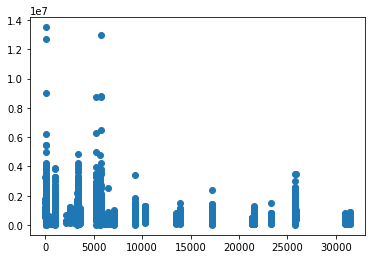

In [31]:
plt.scatter(X,y)

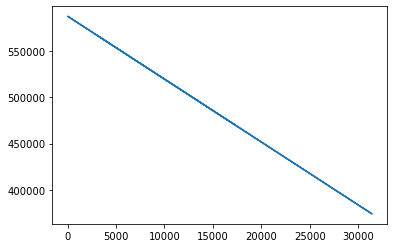

In [32]:
plt.plot(X,y_pred)
plt.show()

In [33]:
new_merge.corr()

,latestPrice,zipcode,Count_Crimes
latestPrice,1.000000,-0.145946,-0.143854
zipcode,-0.145946,1.000000,0.110272
Count_Crimes,-0.143854,0.110272,1.000000


In [34]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.020694001839744458